In [1]:
!pwd
%reload_ext autoreload
%autoreload 2

/Users/samiamer/Documents/School_Files/2022_Junior/Spring_2022/9.60/final_proj


In [2]:
%cd rasta

/Users/samiamer/Documents/School_Files/2022_Junior/Spring_2022/9.60/final_proj/rasta


In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.8.0


In [13]:
new_model = tf.keras.models.load_model('models/default/model.h5')
# new_model.summary()


In [9]:
batch_size = 32
img_height = 224
img_width = 224
test_dir = "data/wikipaintings_small/wikipaintings_test"
val_dir = "data/wikipaintings_small/wikipaintings_val"
test_dir = "data/wikipaintings_small/wikipaintings_test"

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size,
#   label_mode='categorical')

train_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

val_ds = tf.keras.utils.image_dataset_from_directory(
val_dir,
image_size=(img_height, img_width),
batch_size=batch_size,
label_mode='categorical')

test_ds = tf.keras.utils.image_dataset_from_directory(
test_dir,
image_size=(img_height, img_width),
batch_size=batch_size,
label_mode='categorical')

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# print(class_names)

Found 250 files belonging to 25 classes.
Found 250 files belonging to 25 classes.
Found 250 files belonging to 25 classes.


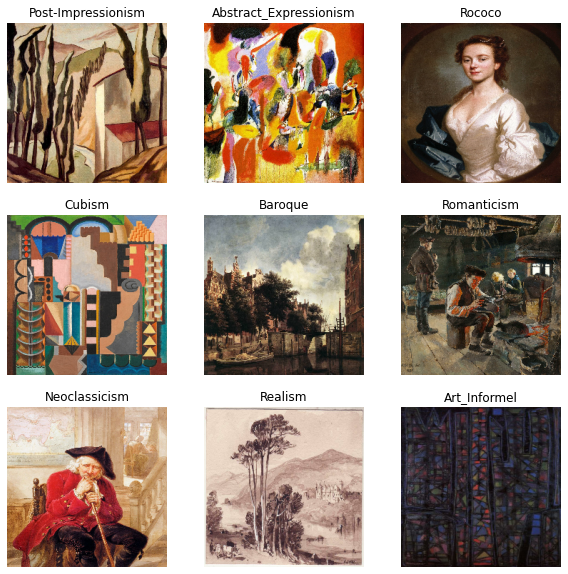

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.math.argmax(labels[i])])
    plt.axis("off")

In [ ]:
train_ds.class_names

['Abstract_Art',
 'Abstract_Expressionism',
 'Art_Informel',
 'Art_Nouveau_(Modern)',
 'Baroque',
 'Color_Field_Painting',
 'Cubism',
 'Early_Renaissance',
 'Expressionism',
 'High_Renaissance',
 'Impressionism',
 'Magic_Realism',
 'Mannerism_(Late_Renaissance)',
 'Minimalism',
 'Naïve_Art_(Primitivism)',
 'Neoclassicism',
 'Northern_Renaissance',
 'Pop_Art',
 'Post-Impressionism',
 'Realism',
 'Rococo',
 'Romanticism',
 'Surrealism',
 'Symbolism',
 'Ukiyo-e']

In [14]:
loss, acc = new_model.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

8/8 - 62s - loss: 12.4817 - accuracy: 0.1560 - 62s/epoch - 8s/step
Restored model, accuracy: 15.60%


In [19]:
new_model.layers.pop()

model2 = tf.keras.Model(new_model.input, new_model.layers[-1].output)
model2.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_1[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d_1[0][0]']       
                                )                                                           

In [20]:
model2.trainable = False
print(model2.layers[-1])

